In [ ]:
#read data and imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from math import sqrt
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets, preprocessing
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
s = pd.read_csv("/content/drive/MyDrive/College/4) First Semester/Machine Learning/Projects/Project 1/Customer Churn.csv")
s = s.loc[:,s.columns != "ID"]
pd.options.mode.chained_assignment = None
s['Churn'].replace(['no', 'yes'],[0, 1], inplace=True)
s['Complains'].replace(['no', 'yes'],[0, 1], inplace=True)
s['Plan'].replace(['pre-paid', 'post-paid'],[0, 1], inplace=True)
s['Status'].replace(['not-active', 'active'],[0, 1], inplace=True)
s.ffill() # fill empty cells
#normalization
for col in s.columns:
    if col == 'Churn' or col =="Complains"  or col == "Plan" or col == "Status" or col == "Age" or col == "Charge Amount":
        pass
    else:
        s[col] = ((s[col] - s[col].mean()) / s[col].std())*10


In [ ]:
#EDA Description
s.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
count,3.150000e+03,3150.000000,3.150000e+03,3150.000000,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3.150000e+03,3150.000000,3150.000000,3150.000000,3.150000e+03,3150.000000
mean,-4.330927e-16,0.076508,1.840644e-15,0.942857,-1.163937e-15,7.218212e-16,-1.578984e-16,-6.676846e-16,-1.371460e-15,0.077778,0.751746,30.998413,-1.917338e-16,0.842857
std,1.000000e+01,0.265851,1.000000e+01,1.521072,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,0.267864,0.432069,8.831095,1.000000e+01,0.363993
min,-1.050118e+01,0.000000,-3.445730e+01,0.000000,-1.065402e+01,-1.209835e+01,-6.519646e+00,-1.365475e+01,-2.045848e+01,0.000000,0.000000,15.000000,-9.109456e+00,0.000000
25%,-9.124506e+00,0.000000,-2.964845e+00,0.000000,-7.339868e+00,-7.395609e+00,-5.985066e+00,-7.846650e+00,-9.254686e+00,0.000000,1.000000,25.000000,-6.908337e+00,1.000000
50%,-2.241137e+00,0.000000,2.867091e+00,0.000000,-3.531424e+00,-2.692866e+00,-4.648615e+00,-1.457741e+00,1.949104e+00,0.000000,1.000000,30.000000,-4.690245e+00,1.000000
75%,6.018905e+00,0.000000,6.366253e+00,1.000000,4.778070e+00,4.448335e+00,1.231769e+00,6.092788e+00,1.949104e+00,0.000000,1.000000,30.000000,6.139388e+00,1.000000
max,3.905907e+01,1.000000,1.686374e+01,10.000000,3.005673e+01,3.231644e+01,3.998885e+01,4.268381e+01,2.435668e+01,1.000000,1.000000,55.000000,3.277092e+01,1.000000


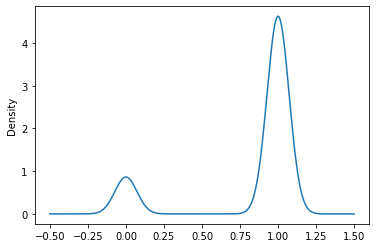

In [ ]:
#Distribution Plot
s['Churn'].plot(kind='kde')

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


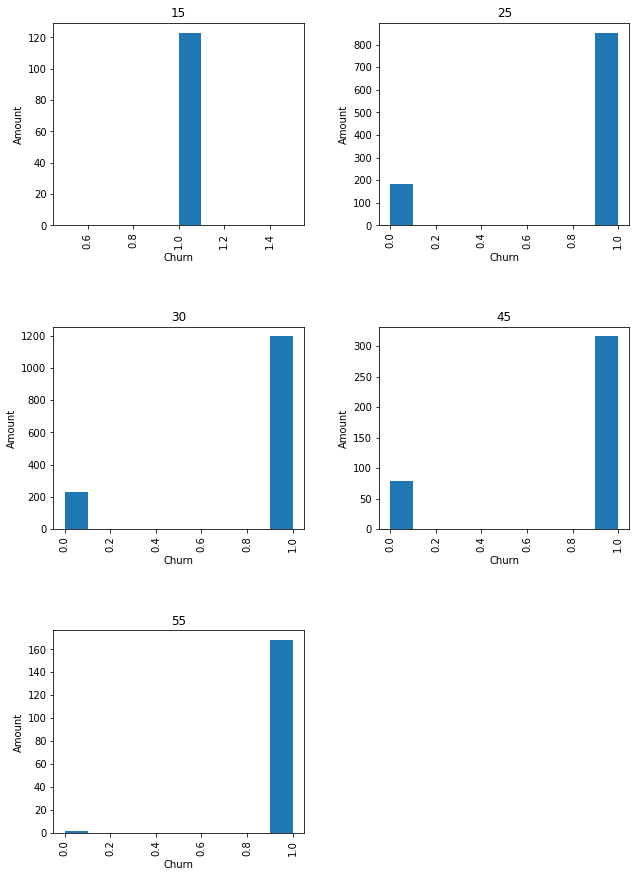

In [ ]:
#histogram vs age
fig = figure(figsize = (10,15))
ax = fig.gca()
axarr = s.hist(column='Churn', by = 'Age', ax = ax)
for ax in axarr.flatten():
    ax.set_xlabel("Churn")
    ax.set_ylabel("Amount")

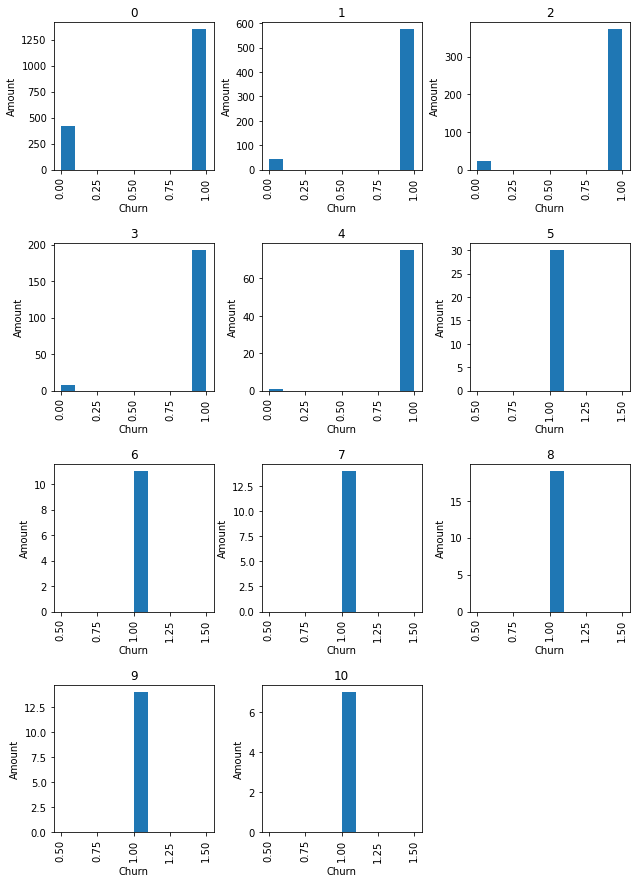

In [ ]:
#histogram vs charge amount
fig = figure(figsize = (10,15))
ax = fig.gca()
axarr = s.hist(column='Churn', by = 'Charge Amount', ax = ax)
# The number on top of the chart is the charge amount
for ax in axarr.flatten():
    ax.set_xlabel("Churn")
    ax.set_ylabel("Amount")

In [ ]:
#describe the charge amount statistics
s['Charge Amount'].describe()

count    3150.000000
mean        0.942857
std         1.521072
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Charge Amount, dtype: float64

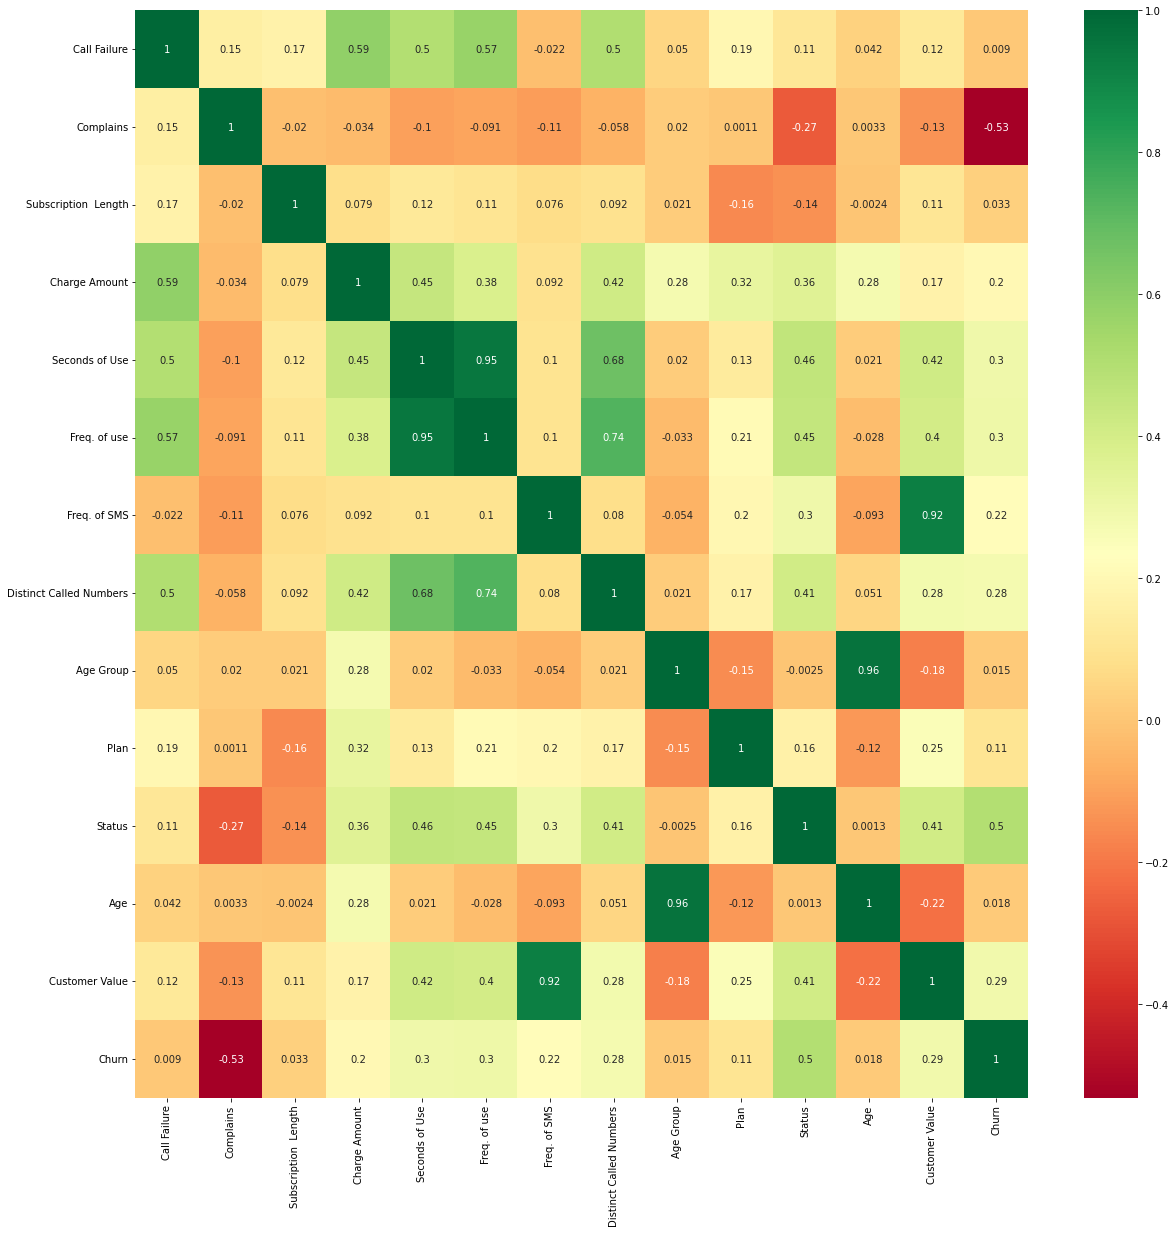

In [ ]:
#correlations 
corrmat = s.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(s[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#split the data to test and train
s.drop("Call Failure", inplace = True , axis = 1 )
s.drop("Complains", inplace = True , axis = 1 )
s.drop("Subscription  Length", inplace = True , axis = 1 )
s.drop("Age", inplace = True , axis = 1 )
s.drop("Age Group", inplace = True , axis = 1 )
x = s.iloc[:,0:8]  # takes all columns except target value
y = s.iloc[:,-1]    # takes target feature 
xLinear = s.iloc[:,0:9]
xLinear.drop("Customer Value", inplace = True , axis = 1 )
yLinear = s.iloc[:,-2]
# churn = yes or no 
# complains = yes or no 
# plan = pre paid or post paid
# status = not active or active
xTrain, xTest, yTrain, yTest= split = train_test_split(x, y, test_size=0.2, random_state=42)
xLinearTrain, xLinearTest, yLinearTrain, yLinearTest = train_test_split(xLinear, yLinear, test_size=0.2, random_state=42)

In [ ]:
#Linear regression 1
LRM1 = LinearRegression()  # create object for the class
LRM1.fit(xLinearTrain, yLinearTrain)  # perform linear regression
l1Pred = LRM1.predict(xLinearTest)  # make predictions
r2L1 = r2_score(yLinearTest, l1Pred)
rmse = sqrt(mean_squared_error(yLinearTest, l1Pred))
mae = mean_absolute_error(yLinearTest,l1Pred)
mse= mean_squared_error(yLinearTest, l1Pred)
print('The R Squared is: ', r2L1)
print('The Root Mean Squared Error is: ', rmse)
print('The Mean Squared Error is: ', mse)
print('The Mean Absolute Error is: ', mae)
print("Coefficients:", LRM1.coef_)
print("Intercept: ", LRM1.intercept_)

The R Squared is:  0.9676459743474902
The Root Mean Squared Error is:  1.7886359758561232
The Mean Squared Error is:  3.199218654126786
The Mean Absolute Error is:  1.011101315022806
Coefficients: [-0.65573689  0.39770515 -0.05329731  0.88106299  0.00735327  2.50915388
  0.38754963 -0.20356699]
Intercept:  0.29361335887572937


In [ ]:
#Linear regression 2
x2Train = xLinearTrain.iloc[:,[0,1,4]]  # values converts it into a numpy array
x2Test = xLinearTest.iloc[:,[0,1,4]]  # values converts it into a numpy array
LRM2 = LinearRegression()  # create object for the class
LRM2.fit(x2Train, yLinearTrain)  # perform linear regression
l2Pred = LRM2.predict(x2Test)  # make predictions
r2L2 = r2_score(yLinearTest, l2Pred)
rmse = sqrt(mean_squared_error(yLinearTest, l2Pred))
mae = mean_absolute_error(yLinearTest,l2Pred)
mse= mean_squared_error(yLinearTest, l2Pred)
print('The R Squared is: ', r2L2)
print('The Root Mean Squared Error is: ', rmse)
print('The Mean Squared Error is: ', mse)
print('The Mean Absolute Error is: ', mae)
print("Coefficients:", LRM2.coef_)
print("Intercept: ", LRM2.intercept_)

In [ ]:
#Linear regression 3
x3Train = xLinearTrain.iloc[:,[1,3,6]]  # values converts it into a numpy array
x3Test = xLinearTest.iloc[:,[1,3,6]]  # values converts it into a numpy array
LRM3 = LinearRegression()  # create object for the class
LRM3.fit(x3Train, yLinearTrain)  # perform linear regression
l3Pred = LRM3.predict(x3Test)  # make predictions
r2L3 = r2_score(yLinearTest, l3Pred)
rmse = sqrt(mean_squared_error(yLinearTest, l3Pred))
mae = mean_absolute_error(yLinearTest,l3Pred)
mse= mean_squared_error(yLinearTest, l3Pred)
print('The R Squared is: ', r2L3)
print('The Root Mean Squared Error is: ', rmse)
print('The Mean Squared Error is: ', mse)
print('The Mean Absolute Error is: ', mae)
print("Coefficients:", LRM3.coef_)
print("Intercept: ", LRM3.intercept_)

The R Squared is:  0.9618146941052989
The Root Mean Squared Error is:  1.9431482507330622
The Mean Squared Error is:  3.775825124326959
The Mean Absolute Error is:  1.0393108051168858
Coefficients: [ 0.32141146  0.89236013 -0.02716941]
Intercept:  0.00419358166211066


Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       103
           1       0.94      0.93      0.93       527

    accuracy                           0.89       630
   macro avg       0.79      0.80      0.80       630
weighted avg       0.89      0.89      0.89       630

Confusion Matrix: 
 [[ 69  34]
 [ 37 490]]


(0.0, 1.0)

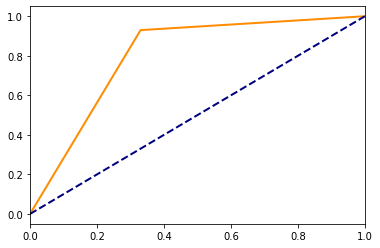

In [ ]:
#KNN with accuracy , f1 score accuracy and confusion matrix
scaler = preprocessing.StandardScaler().fit(xTrain)
knnXTrain = scaler.transform(xTrain)
knnXTest = scaler.transform(xTest)
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(knnXTrain, yTrain)
knnPred = knn.predict(knnXTest)
print("Classification Report: \n", classification_report(yTest, knnPred))
print("Confusion Matrix: \n", confusion_matrix(yTest, knnPred))
fpr, tpr, thresholds = roc_curve(yTest, knnPred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])

Classification Report: 
               precision    recall  f1-score   support

           0       0.32      0.88      0.47       103
           1       0.97      0.63      0.76       527

    accuracy                           0.67       630
   macro avg       0.64      0.76      0.62       630
weighted avg       0.86      0.67      0.71       630

Confusion Matrix: 
 [[ 91  12]
 [195 332]]


(0.0, 1.0)

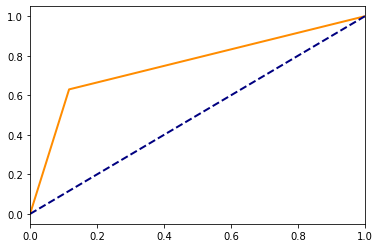

In [ ]:
#Naive Bayes Clasifier
naiveBayes = GaussianNB()
naiveBayes.fit(xTrain, yTrain)
# Test the classifier on the test data
naiveBayesPred = naiveBayes.predict(xTest)
print("Classification Report: \n", classification_report(yTest, naiveBayesPred))
print("Confusion Matrix: \n", confusion_matrix(yTest, naiveBayesPred))
fpr, tpr, thresholds = roc_curve(yTest, naiveBayesPred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.27      0.33       103
           1       0.87      0.93      0.90       527

    accuracy                           0.82       630
   macro avg       0.65      0.60      0.62       630
weighted avg       0.80      0.82      0.81       630

Confusion Matrix: 
 [[ 28  75]
 [ 37 490]]


(0.0, 1.0)

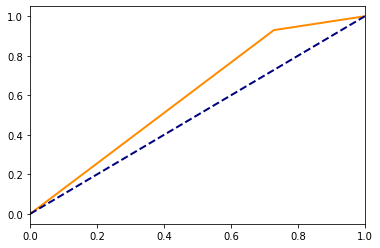

In [ ]:
#logistic regression
logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
logisticRegressionPred = logisticRegression.predict(xTest)
print("Classification Report: \n", classification_report(yTest, logisticRegressionPred))
print("Confusion Matrix: \n", confusion_matrix(yTest, logisticRegressionPred))
fpr, tpr, thresholds = roc_curve(yTest, logisticRegressionPred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
